<a href="https://colab.research.google.com/github/Jonathan-code-hub/Many-Mini-OR-Problems/blob/main/LP_Problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 5: 33 Graphically find all solutions to the following LP:
$$
\begin{aligned}
\max z=4 x_1+x_2 & \\
\text { s.t. } \quad 8 x_1+2 x_2 & \leq 16 \\
x_1+x_2 & \leq 12 \\
x_1, x_2 & \geq 0
\end{aligned}
$$

In [3]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 89.4 MB/s eta 0:00:00


In [7]:
from pulp import LpProblem, LpMaximize, LpVariable
model = LpProblem("",LpMaximize)

# Variables #
x_1 = LpVariable('x_1', lowBound = 0)
x_2 = LpVariable('x_2', lowBound = 0)

# Max Z #
model += 4*x_1 + x_2

# Constraints #
model += 8*x_1 + 2*x_2 <= 16
model += x_1 + x_2 <= 12

# Print Results #

model.solve()
print("X1: ", x_1.value())
print("X2: ", x_2.value())


X1:  0.0
X2:  8.0


Optimal solution:
x1 = 0.0 x2 = 8.0 Z = 8.0


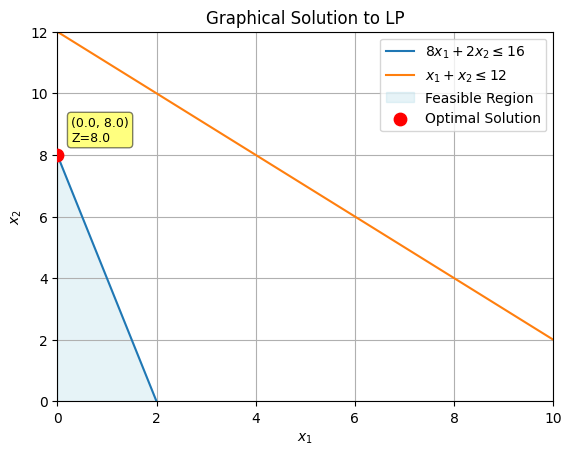

In [9]:
# Plotting Solution #

import matplotlib.pyplot as plt
import numpy as np
from pulp import value

# Variables bounds #
x1 = np.linspace(0, 10, 400)

# Constraint lines #
c1 = (16 - 8*x1)/2     # from 8x1 + 2x2 = 16 #
c2 = 12 - x1           # from x1 + x2 = 12

# Feasible region #
x2 = np.minimum(c1, c2)
x2 = np.maximum(x2, 0)

# Plot constraints #
plt.plot(x1, c1, label=r"$8x_1 + 2x_2 \leq 16$")
plt.plot(x1, c2, label=r"$x_1 + x_2 \leq 12$")
plt.fill_between(x1, 0, x2, alpha=0.3, color='lightblue', label="Feasible Region")

# Solve with PuLP #
print("Optimal solution:")
print("x1 =", x_1.value(), "x2 =", x_2.value(), "Z =", value(model.objective))

# Mark optimal solution #
plt.scatter(x_1.value(), x_2.value(), color="red", s=80, zorder=5, label="Optimal Solution")
plt.annotate(f"({x_1.value():.1f}, {x_2.value():.1f})\nZ={value(model.objective):.1f}",
             (x_1.value(), x_2.value()), textcoords="offset points",
             xytext=(10,10), ha="left", fontsize=9,
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))

# Labels #
plt.xlim(0, max(x1))
plt.ylim(0, max(max(c1), max(c2)))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Graphical Solution to LP")
plt.legend()
plt.grid(True)
plt.show()
